# Covid Data Time Series Plots

All data from: https://coronavirus.data.gov.uk/

### Variables

(Note: all variables are recorded daily).

> <b> Cases by date reported:</b> Number of people who have had at least one positive COVID-19 test result either lab-reported or lateral flow device (England only), by date reported. Positive rapid lateral flow test results can be confirmed with PCR tests taken within 72 hours. If the PCR test results are negative, these are not reported as cases. People tested positive more than once are only counted once. (From: https://coronavirus.data.gov.uk/details/cases)  


> <b>Patients admitted to hospital:</b> Daily numbers of COVID-19 patients admitted to hospital. (From https://coronavirus.data.gov.uk/details/healthcare)


> <b> Patients in hospital: </b> Daily count of confirmed COVID-19 patients in hospital at 8am. (From https://coronavirus.data.gov.uk/details/healthcare)



> <b>Patients in mechanical ventilation beds: </b>COVID-19 patients in mechanical ventilation beds. (From https://coronavirus.data.gov.uk/details/healthcare)



> <b> Deaths with COVID-19 on the death certificate by date of death:</b> Number of deaths of people whose death certificate mentioned COVID-19 as one of the causes. The data are published weekly by the ONS, NRS and NISRA and there is a lag in reporting of at least 11 days because the data are based on death registrations. (From https://coronavirus.data.gov.uk/details/deaths)


> <b> Deaths within 28 days of positive test by date of death: </b> Number of deaths of people who had had a positive test result for COVID-19 and died within 28 days of the first positive test. (From https://coronavirus.data.gov.uk/details/deaths)

> <b> Vaccination uptake, by report date: </b> The number of people of all ages who have received a COVID-19 vaccination, shown as a percentage of the population aged 12 and over. (From https://coronavirus.data.gov.uk/details/vaccinations)

# Loading in the data

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# making plots look like R
plt.style.use('ggplot') 
plt.rc('axes', facecolor='white', edgecolor='black', axisbelow=True, grid=False) 

# defining a function to remove irrelevant columns, and create a datetime index, for the imported data
def drop_and_date(df, drop = True, display_head = True):
    if drop == True:
        df.drop(columns = ['areaType', 'areaCode'], inplace = True)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace = True)
    if display_head == True:
        display(df.head())
    
# creating a dataframe for the 'new cases' data
cases = pd.read_csv('daily_cases_by_date_reported_2021-Oct-20.csv')
drop_and_date(cases)

# creating a dataframe for the 'new hospital admissions' data
admit_hospital = pd.read_csv('hospital_admissions_2021-Oct-20.csv')
drop_and_date(admit_hospital)

# creating a dataframe for the 'patients in hospital' data
n_hospital = pd.read_csv('patients_in_hospital_2021-Oct-20.csv')
drop_and_date(n_hospital)

# creating a dataframe for the 'patients in mechanical ventilation beds' data
vent_beds = pd.read_csv('patients_in_mechanical_ventilation_beds_2021-Oct-20.csv')
drop_and_date(vent_beds)

# creating a dataframe for the 'covid 19 on death certificate' data
deaths = pd.read_csv('daily_deaths_with_COVID-19_on_the_death_certificate_by_date_of_death_2021-Oct-20.csv')
drop_and_date(deaths)

# creating a dataframe for the 'deaths within 28 days of positive test' data
deaths_28 = pd.read_csv('deaths_within_28_days_positive_test_2021-Oct-20.csv')
drop_and_date(deaths_28)

,areaName,newCasesByPublishDate,cumCasesByPublishDate
date,,,
2021-10-20,United Kingdom,49139,8589737
2021-10-19,United Kingdom,43738,8541192
2021-10-18,United Kingdom,49156,8497868
2021-10-17,United Kingdom,45140,8449165
2021-10-16,United Kingdom,43423,8404469


,areaName,newAdmissions,cumAdmissions
date,,,
2021-10-16,United Kingdom,869,562061
2021-10-15,United Kingdom,935,561192
2021-10-14,United Kingdom,893,560257
2021-10-13,United Kingdom,907,559364
2021-10-12,United Kingdom,920,558457


,areaName,hospitalCases
date,,
2021-10-19,United Kingdom,7891
2021-10-18,United Kingdom,7767
2021-10-17,United Kingdom,7407
2021-10-16,United Kingdom,7142
2021-10-15,United Kingdom,7120


,areaName,covidOccupiedMVBeds
date,,
2021-10-19,United Kingdom,850
2021-10-18,United Kingdom,825
2021-10-17,United Kingdom,819
2021-10-16,United Kingdom,805
2021-10-15,United Kingdom,791


,areaName,newDailyNsoDeathsByDeathDate,cumDailyNsoDeathsByDeathDate
date,,,
2021-10-08,United Kingdom,52,164285
2021-10-07,United Kingdom,86,164233
2021-10-06,United Kingdom,79,164147
2021-10-05,United Kingdom,91,164068
2021-10-04,United Kingdom,87,163977


,areaName,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
date,,,
2021-10-19,United Kingdom,26,139031
2021-10-18,United Kingdom,82,139005
2021-10-17,United Kingdom,86,138923
2021-10-16,United Kingdom,99,138837
2021-10-15,United Kingdom,109,138738


# A function to plot the data...

In [2]:
# defining a function to create the time series plots, arguments can be set to True or False to show or 
# not show a specific variable

def covid_plot(new_cases = True, hospital_admissions = True, num_in_hospital = True, 
               ventilator_beds  = True, deaths_certificate = True, deaths_28_days_pos_test = True):
    
    # setting the figure size
    plt.figure(figsize = (18,10))
    
    # display each variable if the relevant argument == True
    if new_cases == True:
        plt.plot(cases.index, cases['newCasesByPublishDate'], label = 'new cases', color = 'blue')
    
    if hospital_admissions == True:
        plt.plot(admit_hospital.index, admit_hospital['newAdmissions'], label = 'new hospital admissions', color = 'orange')
    
    if num_in_hospital == True:
        plt.plot(n_hospital.index, n_hospital['hospitalCases'], label = 'number of patients in hospital', color = 'black')
    
    if ventilator_beds == True:
        plt.plot(vent_beds.index, vent_beds['covidOccupiedMVBeds'], label = 'COVID occupied ventilation beds', color = 'cyan')
    
    if deaths_certificate == True:
        plt.plot(deaths.index, deaths['newDailyNsoDeathsByDeathDate'], label = 'deaths (covid 19 on death certificate)', color = 'red')
    
    if deaths_28_days_pos_test == True:
        plt.plot(deaths_28.index, deaths_28['newDeaths28DaysByDeathDate'], label = 'deaths (within 28 days of positive test)', 
         linestyle = '--', color = 'darkred')
        
    # label the axes and show the plot
    plt.xlabel('Date')
    plt.ylabel('Number')
    plt.legend(loc = 'upper left')
    plt.show()

# All variables on one plot

*Note -* this plot can be interacted with. Change the values of the arguments (`True` or `False`) passed to the `covid_plot()` function, and re-run the cell, in order to plot different combinations of variables:

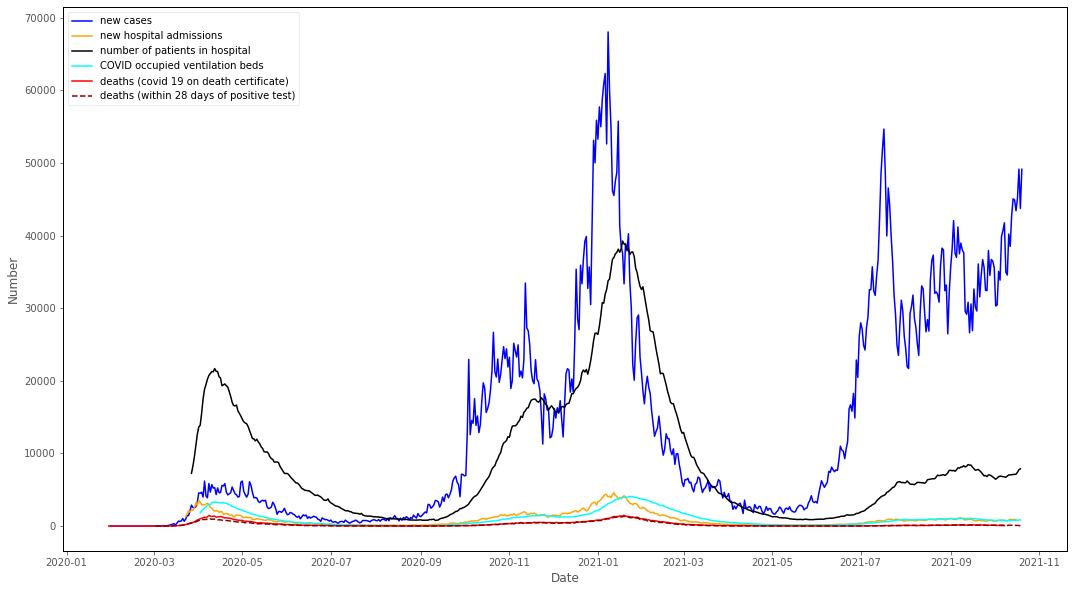

In [3]:
covid_plot(new_cases = True, 
           hospital_admissions = True, 
           num_in_hospital = True, 
           ventilator_beds  = True,
           deaths_certificate = True, 
           deaths_28_days_pos_test = True)

# New hospital admissions, ventilator bed occupancy, and deaths

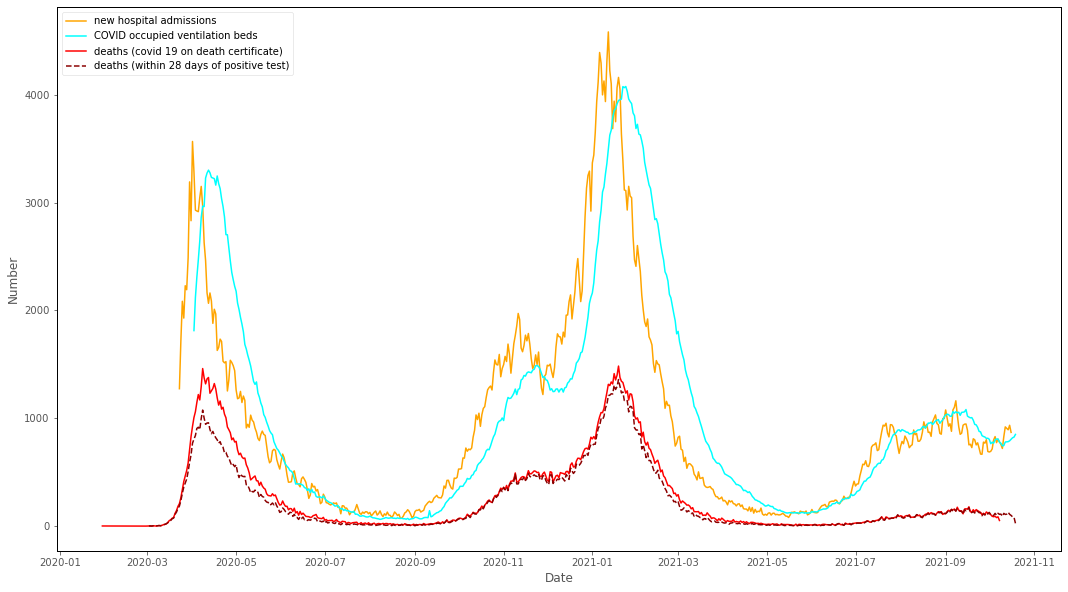

In [4]:
covid_plot(new_cases = False, 
           hospital_admissions = True, 
           num_in_hospital = False, 
           ventilator_beds  = True,
           deaths_certificate = True, 
           deaths_28_days_pos_test = True)

# Deaths

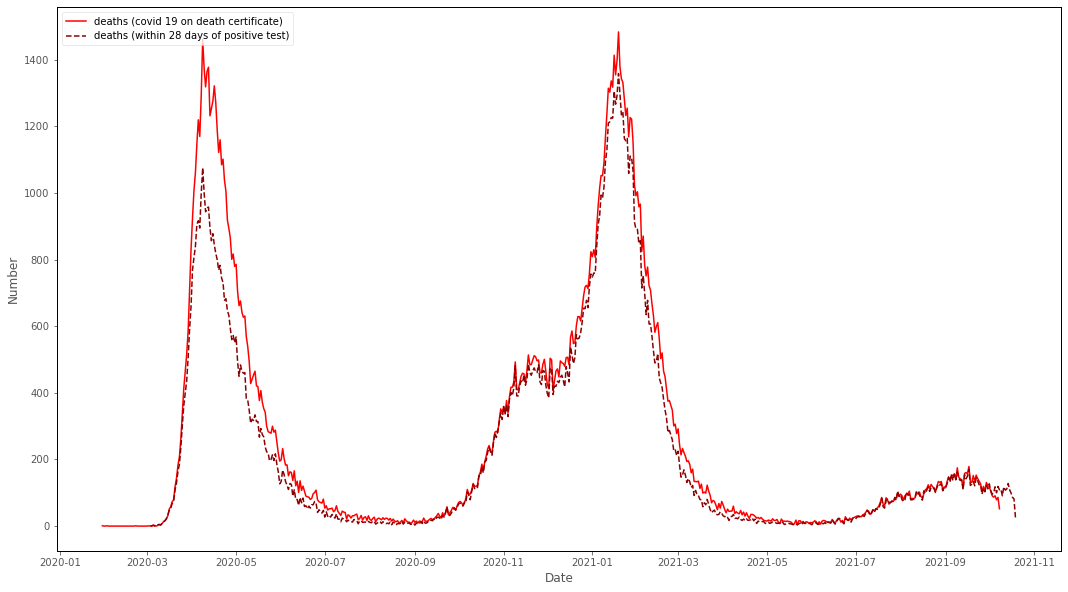

In [5]:
covid_plot(new_cases = False, 
           hospital_admissions = False, 
           num_in_hospital = False, 
           ventilator_beds  = False,
           deaths_certificate = True, 
           deaths_28_days_pos_test = True)

# Cumulative data

In [6]:
# defining a function to create a plot of the cumulative counts, arguments can be set to True or False to show or not show 
# a specific variable

def cumulative_covid_plot(new_cases = True, hospital_admissions = True, deaths_certificate = True, 
                          deaths_28_days_pos_test = True):
    
    # set the figure size
    plt.figure(figsize = (18,10))
    
    # display each variable if the relevant argument == True
    if new_cases == True:
        plt.plot(cases.index, cases['cumCasesByPublishDate'], label = 'cumulative new cases', color = 'darkblue')
    
    if hospital_admissions == True:
        plt.plot(admit_hospital.index, admit_hospital['cumAdmissions'], label = 'cumulative new hospital admissions', color = 'darkorange')
    
    if deaths_certificate == True:
        plt.plot(deaths.index, deaths['cumDailyNsoDeathsByDeathDate'], label = 'cumulative deaths (covid 19 on death certificate)', color = 'crimson')
    
    if deaths_28_days_pos_test == True:
        plt.plot(deaths_28.index, deaths_28['cumDeaths28DaysByDeathDate'], label = 'cumulative deaths (within 28 days of positive test)', 
         linestyle = '--', color = 'darkorange')
        
    # label the axes and show the plot
    plt.xlabel('Date')
    plt.ylabel('Number')
    plt.legend(loc = 'upper left')
    plt.show()

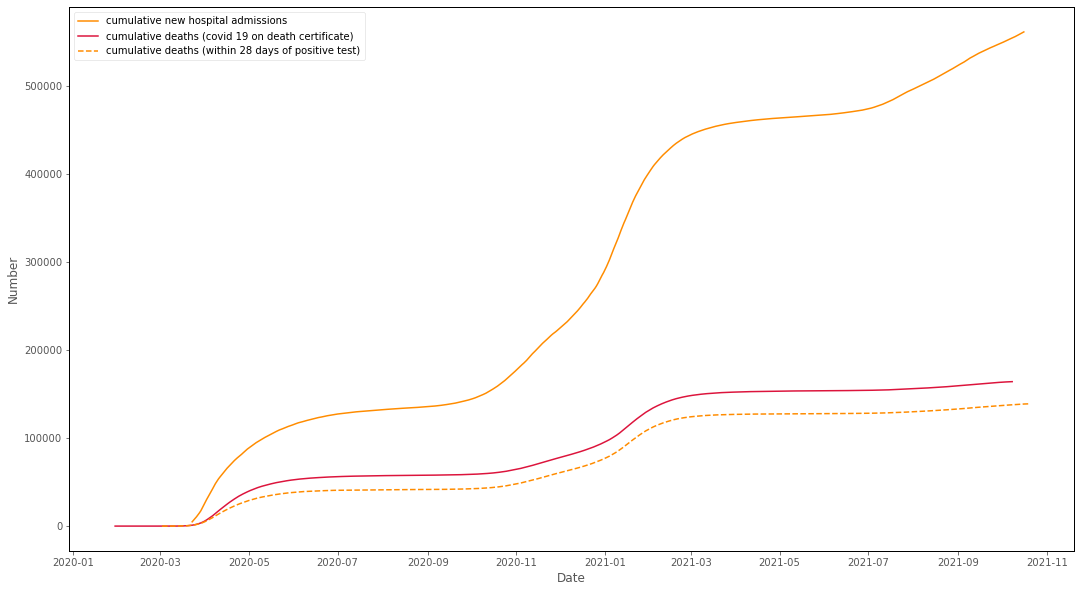

In [7]:
cumulative_covid_plot(new_cases = False, 
                      hospital_admissions = True, 
                      deaths_certificate = True, 
                      deaths_28_days_pos_test = True)

# Do Covid vaccines work?

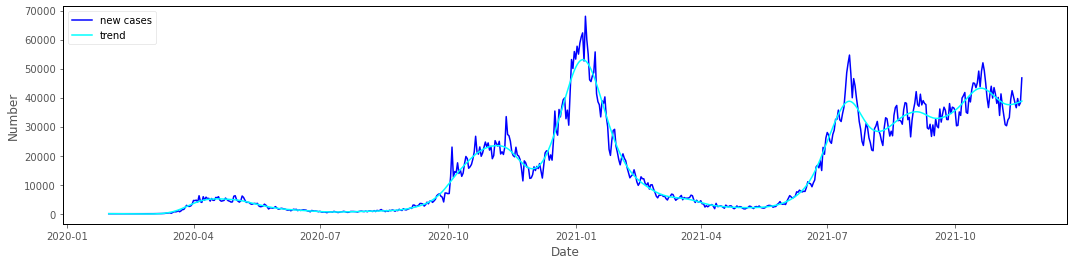

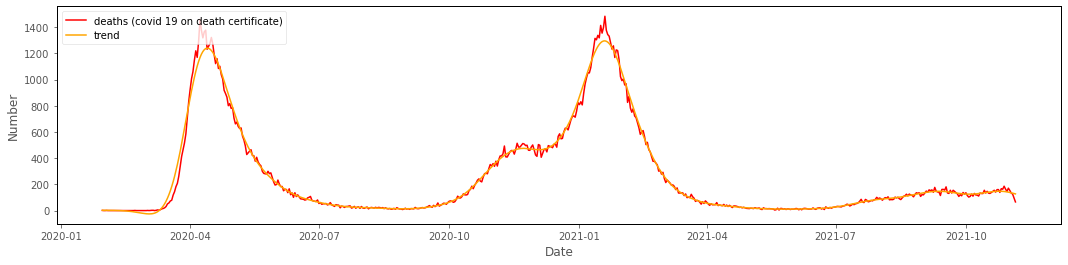

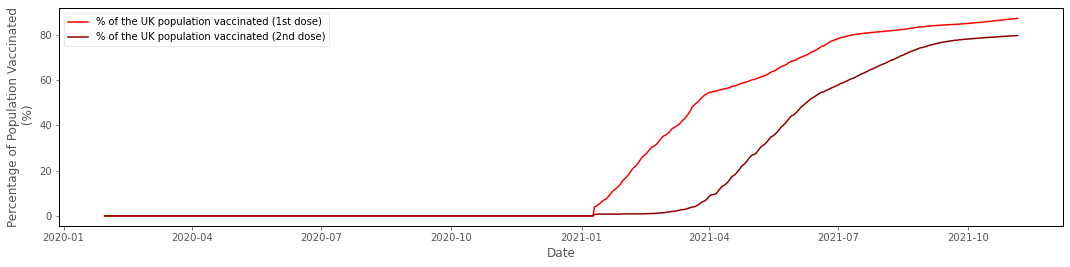

In [8]:
# importing the statsmodels library
import statsmodels.api as sm

# creating a dataframe for the 'new cases' data
cases = pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesByPublishDate%22:%22newCasesByPublishDate%22,%22cumCasesByPublishDate%22:%22cumCasesByPublishDate%22%7D&format=csv')
drop_and_date(cases, drop = False, display_head = False)

# creating a dataframe for the 'covid 19 on death certificate' data
deaths = pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDailyNsoDeathsByDeathDate%22:%22newDailyNsoDeathsByDeathDate%22,%22cumDailyNsoDeathsByDeathDate%22:%22cumDailyNsoDeathsByDeathDate%22%7D&format=csv')
drop_and_date(deaths, drop = False, display_head = False)

# creating a dataframe for the cumulative number of vaccinations 
cumulative_vaccinations = pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22cumVaccinationFirstDoseUptakeByPublishDatePercentage%22:%22cumVaccinationFirstDoseUptakeByPublishDatePercentage%22,%22cumVaccinationSecondDoseUptakeByPublishDatePercentage%22:%22cumVaccinationSecondDoseUptakeByPublishDatePercentage%22,%22cumVaccinationThirdInjectionUptakeByPublishDatePercentage%22:%22cumVaccinationThirdInjectionUptakeByPublishDatePercentage%22%7D&format=csv')
drop_and_date(cumulative_vaccinations, drop = False, display_head = False)


# ensuring the dataframe indexes are the same length, for plotting (e.g. so the x axis is comparable between plots)
# by adding 0's to the vaccinations dataframe, for timepoints prior to the vaccine rollout. E.g. making the vaccinations
# dataframe the same length as the deaths dataframe
cumulative_vacc = deaths.copy()
cumulative_vacc.drop(cumulative_vacc.columns, axis = 1, inplace = True)

# filling the columns with 0s for every timepoint
cumulative_vacc['cumulative_1st_dose'] = np.repeat(0, len(cumulative_vacc.index))
cumulative_vacc['cumulative_2nd_dose'] = np.repeat(0, len(cumulative_vacc.index))

# replacing the 0s with the cumulative vaccination percentages, where there is data
for timepoint_1 in cumulative_vacc.index:
    for timepoint_2 in cumulative_vaccinations.index:
        if timepoint_1 == timepoint_2:
            cumulative_vacc.loc[timepoint_2, 'cumulative_1st_dose'] = cumulative_vaccinations['cumVaccinationFirstDoseUptakeByPublishDatePercentage'].loc[timepoint_2]
            cumulative_vacc.loc[timepoint_2, 'cumulative_2nd_dose'] = cumulative_vaccinations['cumVaccinationSecondDoseUptakeByPublishDatePercentage'].loc[timepoint_2]
            

# using a statistical function from the statsmodels library to extract the trend from the time series
cycle_cases, trend_cases = sm.tsa.filters.hpfilter(cases['newCasesByPublishDate'])
cycle_deaths, trend_deaths = sm.tsa.filters.hpfilter(deaths['newDailyNsoDeathsByDeathDate'])

# plot the cases, and the trend
plt.figure(figsize = (18,4))
plt.plot(cases.index, cases['newCasesByPublishDate'], label = 'new cases', color = 'blue')
plt.plot(cases.index, trend_cases, label = 'trend', color = 'cyan')                                               
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc = 'upper left')
plt.show()

# plot the deaths, and the trend
plt.figure(figsize = (18,4))
plt.plot(deaths.index, deaths['newDailyNsoDeathsByDeathDate'], label = 'deaths (covid 19 on death certificate)', color = 'red')
plt.plot(deaths.index, trend_deaths, label = 'trend', color = 'orange')                                               
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc = 'upper left')
plt.show()   

# plot the proportion of the UK that has been vaccinated 
plt.figure(figsize = (18,4))
plt.plot(cumulative_vacc.index, cumulative_vacc['cumulative_1st_dose'],
         label = '% of the UK population vaccinated (1st dose)', color = 'red')      
plt.plot(cumulative_vacc.index, cumulative_vacc['cumulative_2nd_dose'],
         label = '% of the UK population vaccinated (2nd dose)', color = 'darkred') 
plt.xlabel('Date')
plt.ylabel('Percentage of Population Vaccinated\n (%)')
plt.legend()
plt.show()

***
by pxr687